In [62]:
# Import Data Malipulation Libraries
import pandas as pd
import numpy as np

# Import Data Visualisatiobn libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Filter Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Data Loginggs Libraries
import logging 
logging.basicConfig(level=logging.INFO,
                    filename= 'model.log',
                    filemode= 'w',
                    format='%(asctime)s - %(levelname)s - %(message)s',)
                    

# Import Scikit Learn Libraries for Machine Learning Model Building
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,learning_curve,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.cluster import KMeans


# Multicolinearity test and treatment libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

In [63]:
# Creating Our First Log
logging.info('Import Dataset For Model Building...')

In [64]:
url = "https://raw.githubusercontent.com/Arbajshaikh7030/Online_Shoppers_Purchasing_Intention/refs/heads/main/online_shoppers_intention.csv"

df = pd.read_csv(url)

df.sample(frac=1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
8462,0,0.000000,0,0.0,6,48.000000,0.000000,0.066667,0.000000,0.0,Nov,2,2,4,1,Returning_Visitor,False,False
8118,1,20.000000,0,0.0,21,442.000000,0.008696,0.020290,42.281275,0.0,Nov,2,2,1,13,Returning_Visitor,False,False
1134,0,0.000000,0,0.0,5,103.000000,0.000000,0.040000,0.000000,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
5574,4,49.300000,0,0.0,9,283.700000,0.018182,0.036364,0.000000,0.0,June,1,1,3,3,Returning_Visitor,False,False
11502,0,0.000000,0,0.0,7,178.250000,0.028571,0.057143,0.000000,0.0,Dec,2,10,6,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364,5,99.166667,1,27.0,33,483.266667,0.002778,0.009127,0.000000,0.6,May,8,5,1,2,Returning_Visitor,False,False
9946,0,0.000000,0,0.0,17,308.250000,0.023529,0.064706,0.000000,0.0,Nov,2,2,1,13,Returning_Visitor,False,False
4629,0,0.000000,0,0.0,175,12634.620890,0.001156,0.022134,3.984111,0.0,May,2,2,1,1,Returning_Visitor,True,False
5533,6,85.200000,0,0.0,11,203.000000,0.000000,0.000000,0.000000,0.0,Nov,2,2,5,2,Returning_Visitor,False,False


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [66]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [67]:
df.duplicated().sum()

125

In [68]:
# Removing duplicate rows

df.drop_duplicates()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [69]:
# label Encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = le.fit_transform(df['Weekend'])
df['Revenue'] = le.fit_transform(df['Revenue'])
df['Month'] = le.fit_transform(df['Month'])


In [70]:

from collections import OrderedDict

stats = []

# Descriptive statistics
for col in df.columns:
    if df[col].dtype != 'object':
        numerical_stats = OrderedDict({
            'Feature': col,
            'Minimum': df[col].min(),
            'Maximum': df[col].max(),
            'Mean': df[col].mean(),
            'Mode': df[col].mode(),
            '25%': df[col].quantile(0.25),
            '75%': df[col].quantile(0.75),
            'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
            'Standard Deviation': df[col].std(),
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurt()
        })
        stats.append(numerical_stats)

# Convert to DataFrame
report = pd.DataFrame(stats)

# Outlier Identification :
outlier_label = []
for col in report['Feature']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR   # LW : Lower Whisker Line
    UW = Q3 + 1.5 * IQR   # UW : Upper Whisker Line
    outliers = df[(df[col] < LW) | (df[col] > UW)]
    if not outliers.empty:
        outlier_label.append("Has Outliers")
    else:
        outlier_label.append("No Outliers")

report["Outlier Comment"] = outlier_label

# Checking Report
report

,Feature,Minimum,Maximum,Mean,Mode,25%,75%,IQR,Standard Deviation,Skewness,Kurtosis,Outlier Comment
0,Administrative,0.0,27.000000,2.315166,"0 0 Name: Administrative, dtype: int64",0.000000,4.000000,4.000000,3.321784,1.960357,4.701146,Has Outliers
1,Administrative_Duration,0.0,3398.750000,80.818611,"0 0.0 Name: Administrative_Duration, dtype:...",0.000000,93.256250,93.256250,176.779107,5.615719,50.556739,Has Outliers
2,Informational,0.0,24.000000,0.503569,"0 0 Name: Informational, dtype: int64",0.000000,0.000000,0.000000,1.270156,4.036464,26.932266,Has Outliers
3,Informational_Duration,0.0,2549.375000,34.472398,"0 0.0 Name: Informational_Duration, dtype: ...",0.000000,0.000000,0.000000,140.749294,7.579185,76.316853,Has Outliers
4,ProductRelated,0.0,705.000000,31.731468,"0 1 Name: ProductRelated, dtype: int64",7.000000,38.000000,31.000000,44.475503,4.341516,31.211707,Has Outliers
5,ProductRelated_Duration,0.0,63973.522230,1194.746220,"0 0.0 Name: ProductRelated_Duration, dtype:...",184.137500,1464.157214,1280.019714,1913.669288,7.263228,137.174164,Has Outliers
6,BounceRates,0.0,0.200000,0.022191,"0 0.0 Name: BounceRates, dtype: float64",0.000000,0.016813,0.016813,0.048488,2.947855,7.723159,Has Outliers
7,ExitRates,0.0,0.200000,0.043073,"0 0.2 Name: ExitRates, dtype: float64",0.014286,0.050000,0.035714,0.048597,2.148789,4.017035,Has Outliers
8,PageValues,0.0,361.763742,5.889258,"0 0.0 Name: PageValues, dtype: float64",0.000000,0.000000,0.000000,18.568437,6.382964,65.635694,Has Outliers
9,SpecialDay,0.0,1.000000,0.061427,"0 0.0 Name: SpecialDay, dtype: float64",0.000000,0.000000,0.000000,0.198917,3.302667,9.913659,Has Outliers


In [71]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,5.163990,2.124006,2.357097,3.147364,4.069586,1.718329,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,2.370199,0.911325,1.717277,2.401591,4.025169,0.690759,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,7.000000,3.000000,2.000000,4.000000,4.000000,2.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,9.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


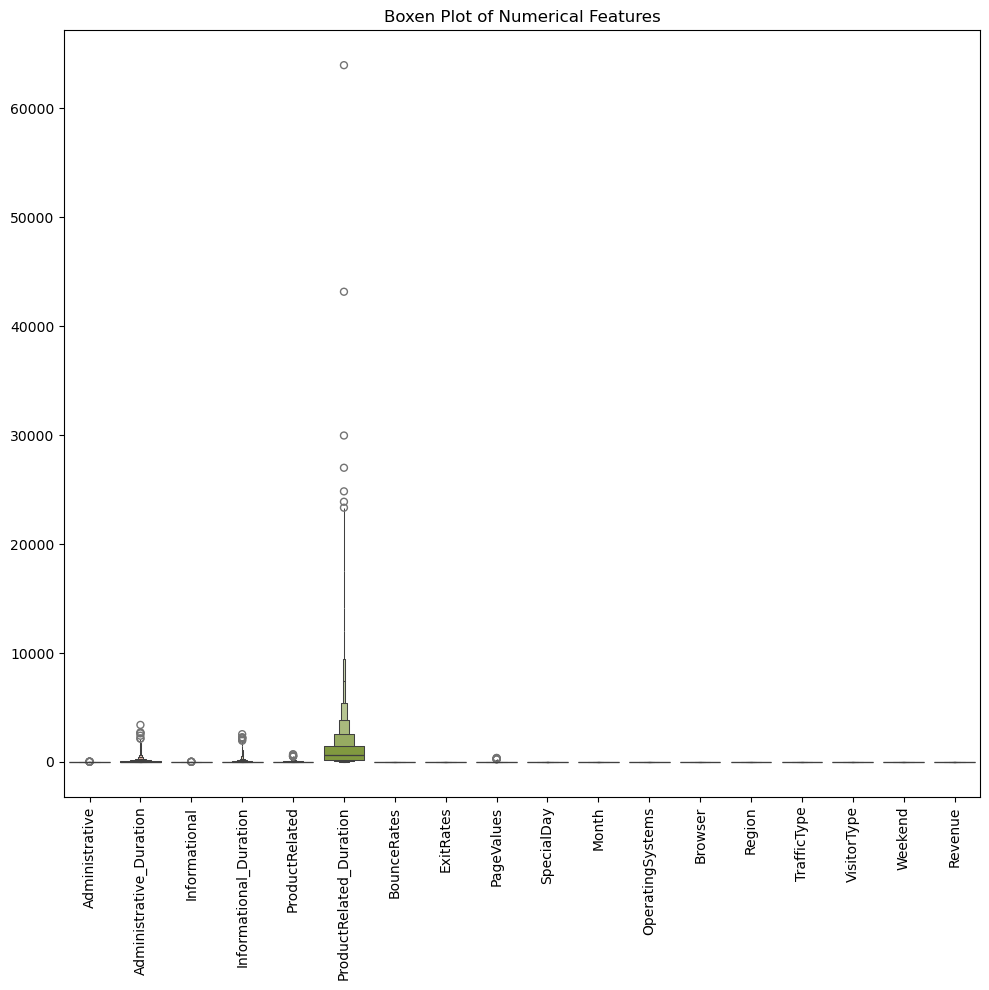

In [72]:
# Checking BoxenPlot 
plt.figure(figsize=(10, 10))
sns.boxenplot(data= df)

plt.xticks(rotation = 90)  
plt.title("Boxen Plot of Numerical Features")
plt.tight_layout()
plt.show()

In [74]:
# Creating Our First Log
logging.info('Outlier Detection and Replacing of Outlier Activity Done Using IQR Method.')

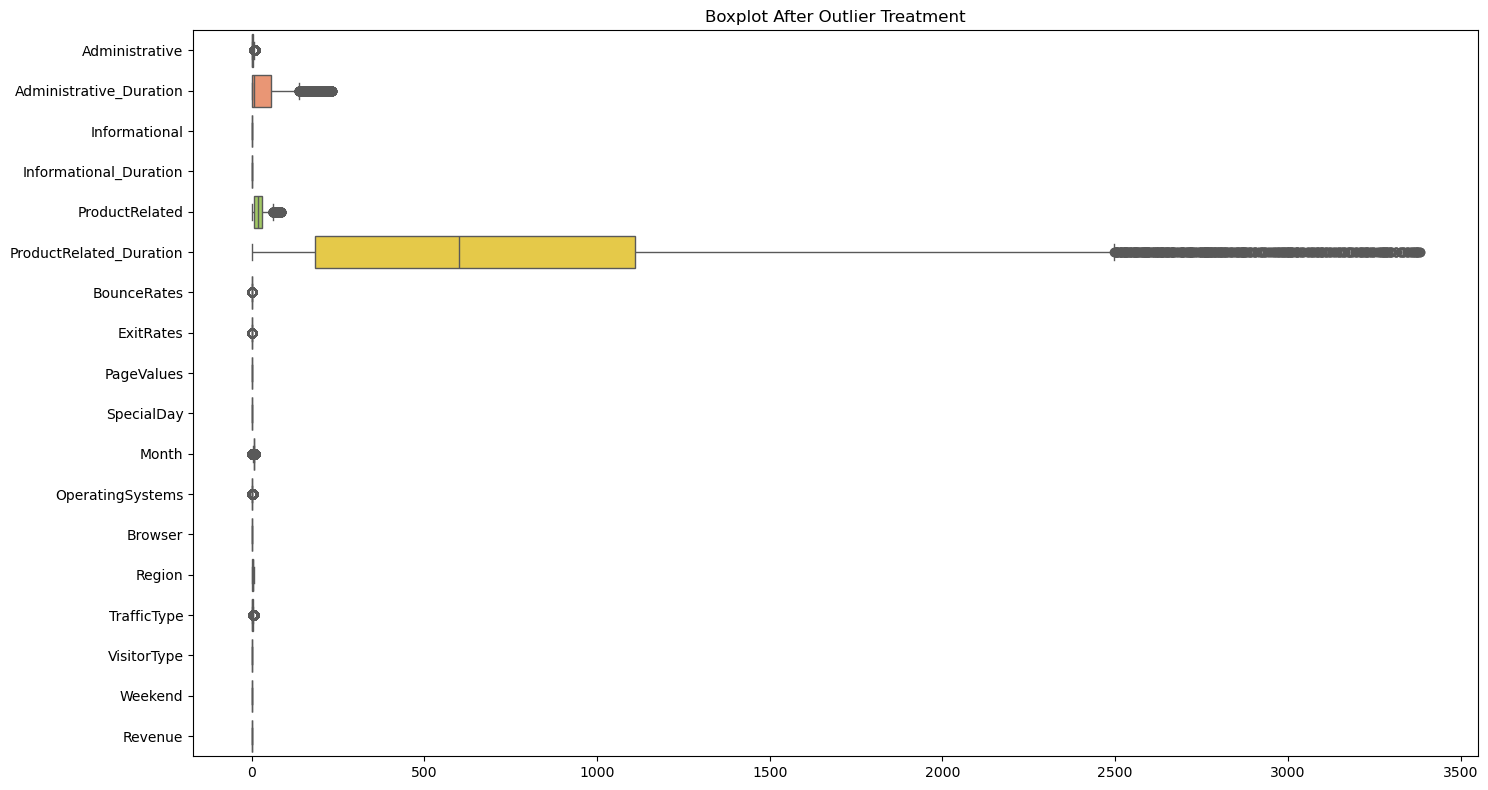

In [75]:
# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplot for all numerical columns
sns.boxplot(data=df, orient='h', palette='Set2')

# Set title
plt.title('Boxplot After Outlier Treatment')
plt.tight_layout()
plt.show()

In [76]:
# Creating Our First Log
logging.info('Outlier Detection and Replacing of Outlier Activity Done Using IQR Method.')

In [77]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

<Axes: >

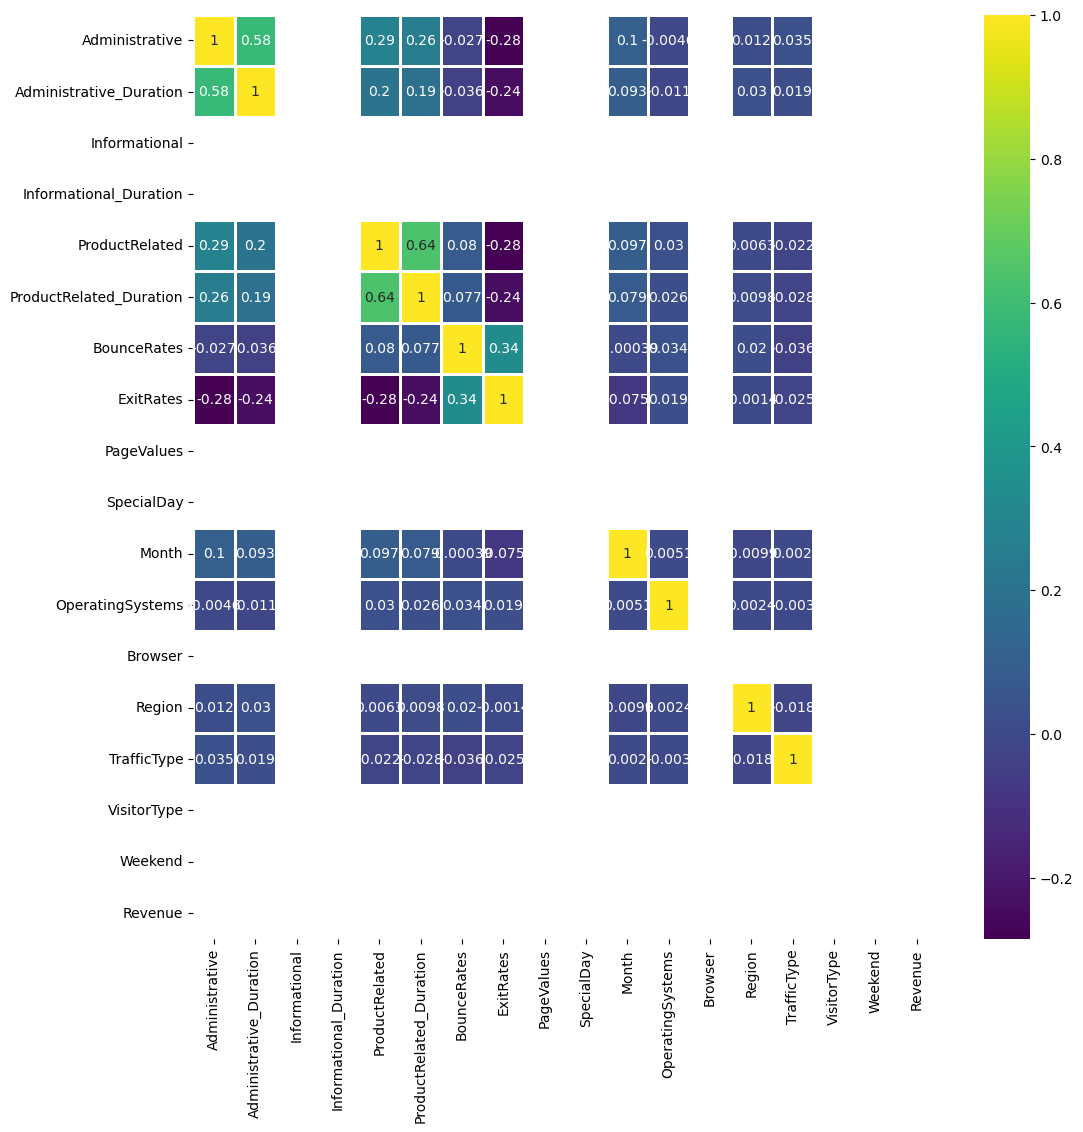

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot =True,cmap='viridis',linewidths=1)

In [86]:
# Creating Our First Log
logging.info('Correlation Matrix plotted and PCA Technique Started....')

In [96]:
def train_and_test_split(data, tcol, testSize=0.3, randomState=3):
    X = data.drop(tcol,axis=1)
    y = data[tcol]
    return train_test_split(X,y,test_size = testSize,random_state=randomState)